# Functions Demo

This notebook contains all graphing functions used in our data analysis. Each cell contains one function and runs it at the end with predefined parameters, which can be altered by the user.

The first cell simply imports the relevant packages and loads the data files.

In [2]:
import matplotlib.pyplot as plt
import data_handling as dh
import create_line_graph as lg
import create_bar_graph as bg
%matplotlib inline

# Importing all relevant sets using the data_handling module
cbsdata_NL = dh.load_data_asylum_NL("Asylum NL.csv")
cbsdata_int = dh.load_data_asylum_int("Asylum International.csv")
gender_df = dh.load_data_gender('data_gender.csv')
age_df = dh.load_data_age('data_age.csv')
mar_stat_df = dh.load_data_mar_status('data_mar_status.csv')

## Line Graph NL

Creates a line graph for asylum requests to the Netherlands over time.

Parameters:
- Start year (between 1975 and 2018)
- End year (between 1975 and 2018)
- Countries (list of countries, must be one of the countries defined in 'country_dict')

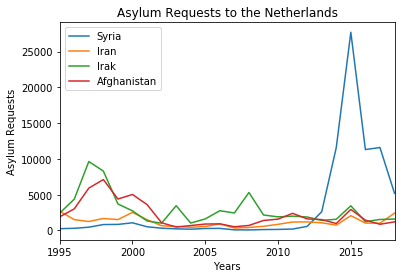

In [8]:
# function to graph asylum requests to the Netherlands from different countries of origin over time
def line_graph_NL(cbsdata,start_year,end_year,countries):
    
    # Dictionary that relates country to country code
    country_dict = {'Total Requests':'T001059','Syria':'NAT9444','Iran':'NAT9351',\
                    'China':'NAT9310','Turkey':'NAT9458','Afghanistan':'NAT9278','Irak':'NAT9350',\
                    'Eritrea':'NAT9326','Sudan':'NAT9437','Bosnia and Herzegovina':'NAT9298',\
                    'Romania':'NAT9417'}
    
    for country in countries:     
        # Creates list including all years and a copy
        years = []
        trimmed_years = []
        i = int(start_year)
        while i <= int(end_year):
            years.append(i)
            trimmed_years.append(i)
            i = i + 1     
               
        # Trims the dataframe down to only the required country
        country_data = cbsdata[cbsdata['Nationaliteit']==country_dict[country]]
    
        # Creates a list of asylum requests per year for that country. If there is
        # no data available, the data point is not taken into accout (year removed from list). 
        asylum_requests = []
        for i in years:
            try:
                asylum_requests.append(int(country_data[country_data['Perioden']==str(i)].iloc[0,2]))
            except:
                trimmed_years.remove(i)        
    
        # Plot the asylum requests over time for the country
        plt.plot(trimmed_years,asylum_requests,label=country)
    
    # sets the axes labels and ticks
    plt.xlabel('Years')
    # forces all xticks to take integer values (since they are years)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim(start_year, end_year)
    plt.ylabel('Asylum Requests')
    plt.title('Asylum Requests to the Netherlands')
    plt.legend()
    
start_year = 1995
end_year = 2018
countries = ['Syria','Iran','Irak','Afghanistan',]

line_graph_NL(cbsdata_NL,start_year,end_year,countries)

## Line Graph International

Creates a line graph for asylum requests to the different countries over time.

Parameters:
- Start year (between 2008 and 2016)
- End year (between 2008 and 2016)
- Countries (list of countries, must be one of the countries defined in 'country_dict')

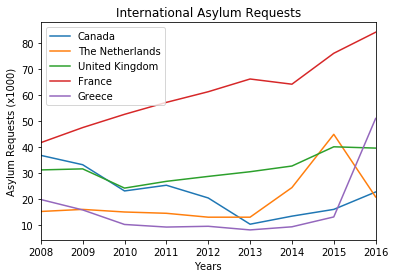

In [10]:
# function to graph asylum requests to different countries over time
def line_graph_int(cbsdata,start_year,end_year,countries):
    
    # Dictionary that relates country to country code
    country_dict = {'The Netherlands':'L008691','EU Total':'L008530','Belgium':'L008552', \
                    'Denmark':'L008588','Germany':'L008592','France':'L008605','Greece':'L008615', \
                    'Hungary':'L008627','Italy':'L008636','Czech Republic':'L008764', \
                    'United Kingdom':'L008776','Norway':'L008704','Canada':'L008571', \
                    'United States of America':'L008778'}
    
    for country in countries:     
        # Creates list including all years and a copy
        years = []
        trimmed_years = []
        i = int(start_year)
        while i <= int(end_year):
            years.append(i)
            trimmed_years.append(i)
            i = i + 1     
               
        # Trims the dataframe down to only the required country
        country_data = cbsdata[cbsdata['Landen']==country_dict[country]]
    
        # Creates a list of asylum requests per year for that country. If there is
        # no data available, the data is not taken into accout (year removed from list). 
        asylum_requests = []
        for i in years:
            try:
                asylum_requests.append(float(country_data[country_data['Perioden']==str(i)].iloc[0,2]))
            except:
                trimmed_years.remove(i)        
        
        # Plot the asylum requests over time for the country
        plt.plot(trimmed_years,asylum_requests,label=country)
    
    # sets the axes labels and ticks
    plt.xlabel('Years')
    # forces all xticks to take integer values (since they are years)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim(start_year, end_year)
    plt.ylabel('Asylum Requests (x1000)')
    plt.title('International Asylum Requests')
    plt.legend()
    
start_year = 2008
end_year = 2016
countries = ['Canada','The Netherlands','United Kingdom','France','Greece']

line_graph_int(cbsdata_int,start_year,end_year,countries)

## Gender Bar Graph

Creates a bar graph showing the gender distribution of migrants to the Netherlands.

Parameters:
- Countries (list of countries, must be one of the countries defined in 'country_dict')

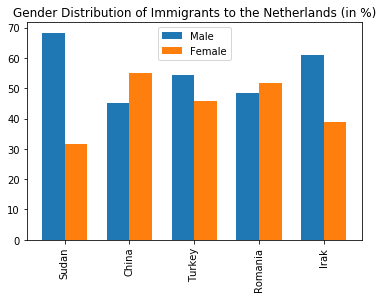

In [12]:
# functions to create bar graphs per demographic
def create_bargraph_gender(dataframe, country_list):
    # Dictionary that relates country to country code
    country_dict = {'Total Immigration':'T001175','Syria':'G008753','Iran':'G008634',\
                    'China':'G008575','Turkey':'G008766','Afghanistan':'G008533','Irak':'G008633',\
                    'Eritrea':'G008597','Sudan':'G008746','Bosnia and Herzegovina':'G008559',\
                    'Romania':'G008723'}
    # variables used for plotting later
    n = len(country_list)
    graph_list = []      
    # get gender distribution per country
    for country in country_list:
        # choose data only for specific country
        df_chosen = dataframe[dataframe['Geboorteland'] == country_dict[country]]
        Male = 0
        Female = 0
        total = 0
        # sum immigration numbers from all years, assign to gender variables
        for index, year in df_chosen.iterrows():
            if year['Geboorteland'] == country_dict[country]:
                if year['Geslacht'] == 3000:
                    Male += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['Geslacht'] == 4000:
                    Female += year['Immigratie_1']
                    total += year['Immigratie_1']
        
        # nest lists into graph_list that can be graphed later
        # one nested item includes country's name, gender and percentage of immigrants
        male_list = [country, 'Male', ((Male/total)*100)]
        graph_list.append(male_list)
        female_list = [country, 'Female', ((Female/total)*100)]
        graph_list.append(female_list)
    
    # set up graph
    fig = plt.figure()
    ax = fig.add_subplot(111)
    space = 0.3 # space between clusters
    gender = ['Male', 'Female']
    x = len(gender)
    width = (1 - space) / x # width of bars
    
    # graph each gender
    for i, gend in enumerate(gender):
        numb = [] # y axis values
        pos = [] # x axis vlaues
        
        #get list with numbers for each gender individually 
        for z in range(n*2):
            #choose numbers in list for right gender
            if graph_list[z][1] == gend:
                numb.append(graph_list[z][2])
                
        # get integers for each bar - x axis
        j_list =[] #later use for x-axis lalbelling
        for j in range(1,len(country_list)+1):
            j_list.append(j-(width/2)) # xtickts will be in the middle of a cluster
            pos.append(j - (1 - space) / 2. + i * width)
        ax.bar(pos, numb, width=width)
    
    # adjust entire graph
    ax.set_xticks(j_list)
    ax.set_xticklabels(country_list)
    plt.setp(plt.xticks()[1], rotation=90)
    plt.title('Gender Distribution of Immigrants to the Netherlands (in %)')
    ax.legend(gender)
    
countries = ['Sudan','China','Turkey','Romania','Irak']
    
create_bargraph_gender(gender_df,countries)

## Age Bar Graph

Creates a bar graph showing the age distribution of migrants to the Netherlands.

Parameters:
- Countries (list of countries, must be one of the countries defined in 'country_dict')

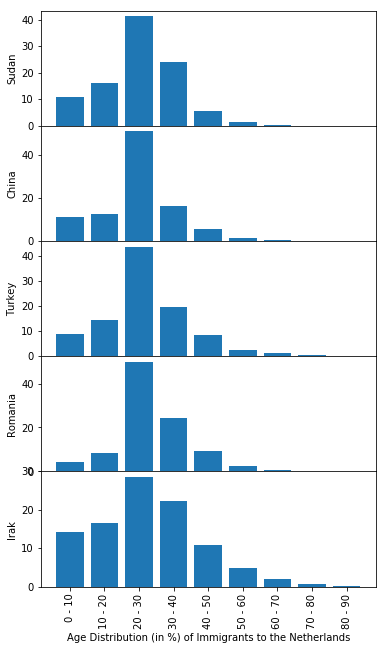

In [14]:
# function for demographic age
def create_bargraph_age(dataframe, country_list):
    # Dictionary that relates country to country code
    country_dict = {'Total Immigration':'T001175','Syria':'G008753','Iran':'G008634',\
                        'China':'G008575','Turkey':'G008766','Afghanistan':'G008533','Irak':'G008633',\
                        'Eritrea':'G008597','Sudan':'G008746','Bosnia and Herzegovina':'G008559',\
                        'Romania':'G008723'}
    # set up basics
    i = 0    
    n = len(country_list)
    fig = plt.figure()
    # plot each country individually
    for country in country_list:
        i +=1
        # choose data only for specific country 
        df_chosen = dataframe[dataframe['Geboorteland'] == country_dict[country]]
        # variables for age groups
        younger10 = 0
        younger20 = 0
        younger30 = 0
        younger40 = 0
        younger50 = 0
        younger60 = 0
        younger70 = 0
        younger80 = 0
        younger90 = 0
        total = 0
        
        # sum immigration numbers from all years and add to age groups
        for index, year in df_chosen.iterrows():
            if year['Geboorteland'] == country_dict[country]:
                if year['LeeftijdOp31December'] == 60100:
                    younger10 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60200:
                    younger20 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60300:
                    younger30 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60400:
                    younger40 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60500:
                    younger50 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60600:
                    younger60 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60700:
                    younger70 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60800:
                    younger80 += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['LeeftijdOp31December'] == 60900:
                    younger90 += year['Immigratie_1']
                    total += year['Immigratie_1']
         
        # set layout for graph    
        x = list(range(9))
        data = [younger10, younger20, younger30, younger40, younger50, younger60, younger70, \
                younger80, younger90]    
        labels = ['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50',\
                  '50 - 60', '60 - 70', '70 - 80', '80 - 90']
        # convert data into percentages
        v = 0
        for number in data:
            data[v] = (number/total)*100
            v += 1 
        
        fig.add_subplot(n, 1, i)
        plt.bar(x, data, label=country)
        plt.ylabel(f'{country}')
    
    # plot all next to each other
    plt.subplots_adjust(bottom=0, top=2, hspace=0)
    plt.xticks(x, labels, rotation='vertical')
    plt.xlabel('Age Distribution (in %) of Immigrants to the Netherlands')
    plt.show()

countries = ['Sudan','China','Turkey','Romania','Irak']
    
create_bargraph_age(age_df,countries)

## Marital Status Bar Graph

Creates a bar graph showing the marital status distribution of migrants to the Netherlands.

Parameters:
- Countries (list of countries, must be one of the countries defined in 'country_dict')

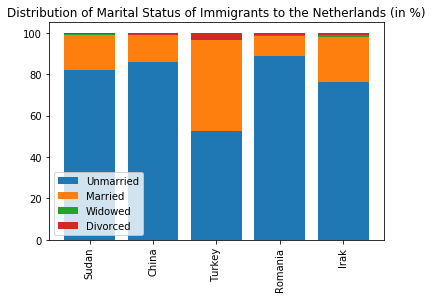

In [16]:
# function for demographic marital status  
def create_bargraph_mar_status(dataframe, country_list):
    # Dictionary that relates country to country code
    country_dict = {'Total Immigration':'T001175','Syria':'G008753','Iran':'G008634',\
                        'China':'G008575','Turkey':'G008766','Afghanistan':'G008533','Irak':'G008633',\
                        'Eritrea':'G008597','Sudan':'G008746','Bosnia and Herzegovina':'G008559',\
                        'Romania':'G008723'}

    n = len(country_list)
    
    # storage for data on all countries
    data_unmarried = []
    data_married = []
    data_widowed = []
    data_divorced = []
    
    # get data for each country individually
    for country in country_list:
        # choose data only for specific country
        df_chosen = dataframe[dataframe['Geboorteland'] == country_dict[country]]
        # variables for eahc marital status
        unmarried = 0
        married = 0
        widowed = 0
        divorced = 0
        total = 0
        
        # sum immigration numbers from all years and add to corresponding variable
        for index, year in df_chosen.iterrows():
            if year['Geboorteland'] == country_dict[country]:
                if year['BurgerlijkeStaat'] == 1010:
                    unmarried += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['BurgerlijkeStaat'] == 1020:
                    married += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['BurgerlijkeStaat'] == 1050:
                    widowed += year['Immigratie_1']
                    total += year['Immigratie_1']
                elif year['BurgerlijkeStaat'] == 1080:
                    divorced += year['Immigratie_1']
                    total += year['Immigratie_1']
      
        # add data in percent for country to list as items to be called by index later
        data_unmarried.append((unmarried/total)*100) 
        data_married.append((married/total)*100)
        data_widowed.append((widowed/total)*100)
        data_divorced.append((divorced/total)*100)
        
    # set up graph delimiters
    x = list(range(n))
    labels = ["Unmarried", "Married", "Widowed", "Divorced"]
    
    # graph each marital status as stacks on top of another
    p1 = plt.bar(x, data_unmarried)
    p2 = plt.bar(x, data_married, bottom=data_unmarried)
    bottom = [sum(x) for x in zip(data_unmarried, data_married)] # starting point for next bar stack is top of old one
    p3 = plt.bar(x, data_widowed, bottom=bottom)
    bottom = [sum(x) for x in zip(data_unmarried, data_married, data_widowed)]# starting point for next bar stack is top of old one
    p4 = plt.bar(x, data_divorced, bottom=bottom)
    
    # adjust graph display
    plt.xticks(x, country_list, rotation='vertical')
    plt.legend(labels)
    plt.title('Distribution of Marital Status of Immigrants to the Netherlands (in %)')
    plt.show()
    
countries = ['Sudan','China','Turkey','Romania','Irak']
    
create_bargraph_mar_status(mar_stat_df,countries)